# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna. (10000 baris)
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

1. **Sumber Dataset**:  
    https://www.kaggle.com/datasets/thomaschow0716/uk-student-accomodation  
    path = kagglehub.dataset_download("thomaschow0716/uk-student-accomodation")  
    Data di-attach di folder, dengan nama accommodation.csv

2. **Ketentuan Dataset**:
    - **Tanpa Label**
    - **Jumlah Baris**: 6324 baris
    - **Tipe Data**:
        - *Kategorikal*: type, address, available_date, Gas, Electricity, Water, Internet, Fridge, Freezer, Oven, Microwave, Dishwasher, Washing machine, Dryer, Furnished, Double glazing, Separate lounge, Bath, Shower, Alarm, Fire alarm, Garden, Off road parking, Garage, Wifi, Sky/Cable package, Energy performance certificate, Gas safe registered, Electrical safety certificate, NRLA registered.
        - *Numerikal*: Price, Bedrooms, Bathrooms, deposit, dan rooms_available.

In [35]:
path = 'accommodation.csv'

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import numpy as np
import seaborn as sns
import plotly.express as px # Mengimpor pustaka plotly untuk visualisasi grafik
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [90]:
# Membaca dataset dan menampilkan 5 baris pertama
data_source = pd.read_csv(path)
data_source.head()

,Price,Bedrooms,Bathrooms,type,address,deposit,available_date,rooms_available,Gas,Electricity,...,Fire alarm,Garden,Off road parking,Garage,Wifi,Sky/Cable package,Energy performance certificate,Gas safe registered,Electrical safety certificate,NRLA registered
0,120.0,4.0,1.0,house,"Adderley road, Clarendon park, Leicester, LE21WD",300.0,1st July 2024,4.0,Yes,Yes,...,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No
1,109.0,4.0,1.0,house,"Pybus Street, University of Derby, Derby, DE223BD",150.0,1st July 2024,4.0,Yes,Yes,...,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No
2,123.0,5.0,2.0,house,"Sheffield Road, Near university, Portsmouth, P...",123.0,1st August 2024,1.0,Yes,Yes,...,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes
3,130.0,6.0,2.0,house,"Marle Hill Parade, Francis Close Hall, Chelten...",296.0,12th July 2024,6.0,Yes,Yes,...,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes
4,125.0,5.0,1.0,house,"Somers road, Southsea, Portsmouth, PO54PX",300.0,8th August 2024,5.0,Yes,Yes,...,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**

- Jumlah baris dan kolom dalam dataset.

In [91]:
data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           6311 non-null   float64
 1   Bedrooms                        6311 non-null   float64
 2   Bathrooms                       6311 non-null   float64
 3   type                            6311 non-null   object 
 4   address                         6310 non-null   object 
 5   deposit                         3523 non-null   float64
 6   available_date                  5151 non-null   object 
 7   rooms_available                 6311 non-null   float64
 8   Gas                             6324 non-null   object 
 9   Electricity                     6324 non-null   object 
 10  Water                           6324 non-null   object 
 11  Internet                        6324 non-null   object 
 12  Fridge                          63

In [92]:
# Menampilkan statistik deskriptif dari dataset
print(data_source.describe(include="all"))

              Price     Bedrooms    Bathrooms   type  \
count   6311.000000  6311.000000  6311.000000   6311   
unique          NaN          NaN          NaN      3   
top             NaN          NaN          NaN  house   
freq            NaN          NaN          NaN   3958   
mean     148.027328     3.894153     2.049279    NaN   
std       64.740230     2.207439     1.561709    NaN   
min       61.150000     1.000000     1.000000    NaN   
25%      110.000000     2.000000     1.000000    NaN   
50%      130.000000     4.000000     1.000000    NaN   
75%      163.000000     6.000000     2.000000    NaN   
max      785.000000     9.000000     9.000000    NaN   

                                                  address      deposit  \
count                                                6310  3523.000000   
unique                                               3602          NaN   
top     2A Old Town Street, City Centre, Plymouth, PL11AE          NaN   
freq                           

2. **Menangani Data yang Hilang**

- Identifikasi data hilang.

In [94]:
missing_values = data_source.isnull().sum()
missing_values[missing_values > 0]

Price                13
Bedrooms             13
Bathrooms            13
type                 13
address              14
deposit            2801
available_date     1173
rooms_available      13
dtype: int64

3. **Analisis Distribusi dan Korelasi**

- Distribusi histogram.

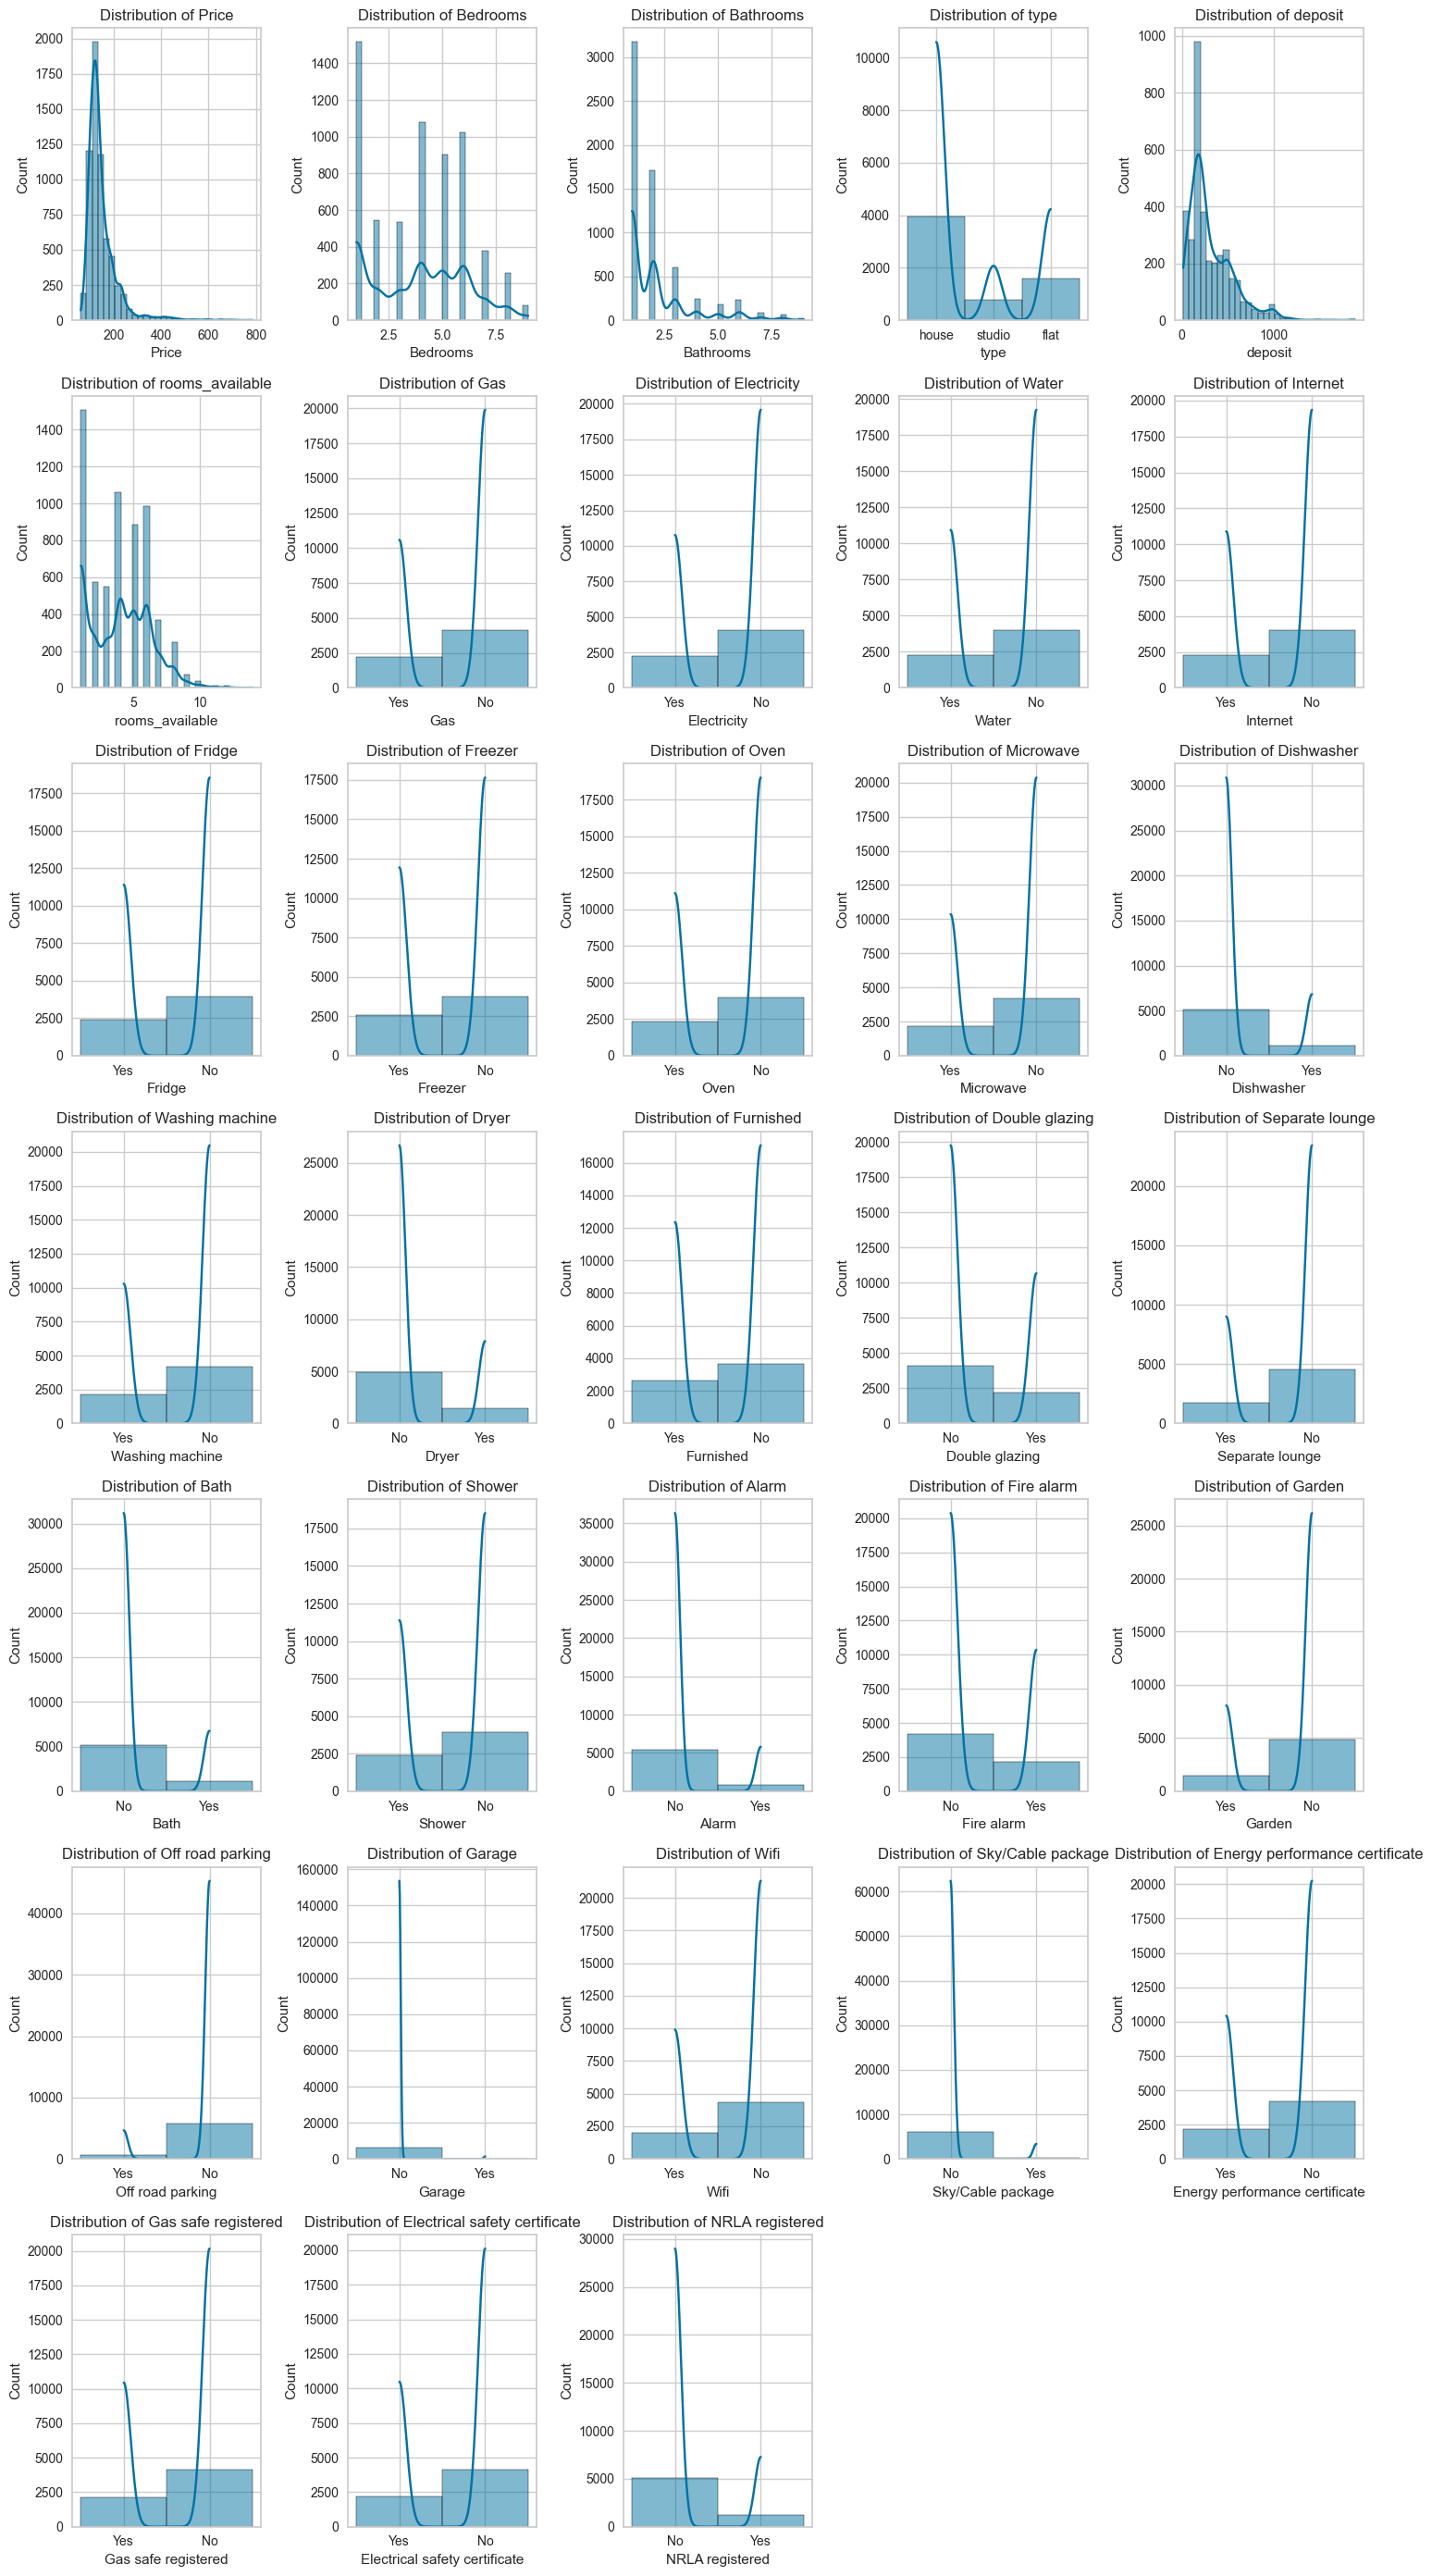

In [97]:
# Grafik

plt.figure(figsize=(15, (len(data_source.loc[:, ~data_source.columns.isin(['address', 'available_date'])].columns) // 5 + 1) * 4))
for i, column in enumerate(data_source.loc[:, ~data_source.columns.isin(['address', 'available_date'])].columns, 1):
    plt.subplot((len(data_source.loc[:, ~data_source.columns.isin(['address', 'available_date'])].columns) // 5 + 1), 5, i)
    sns.histplot(data_source[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

- Korelasi nulai numerik.

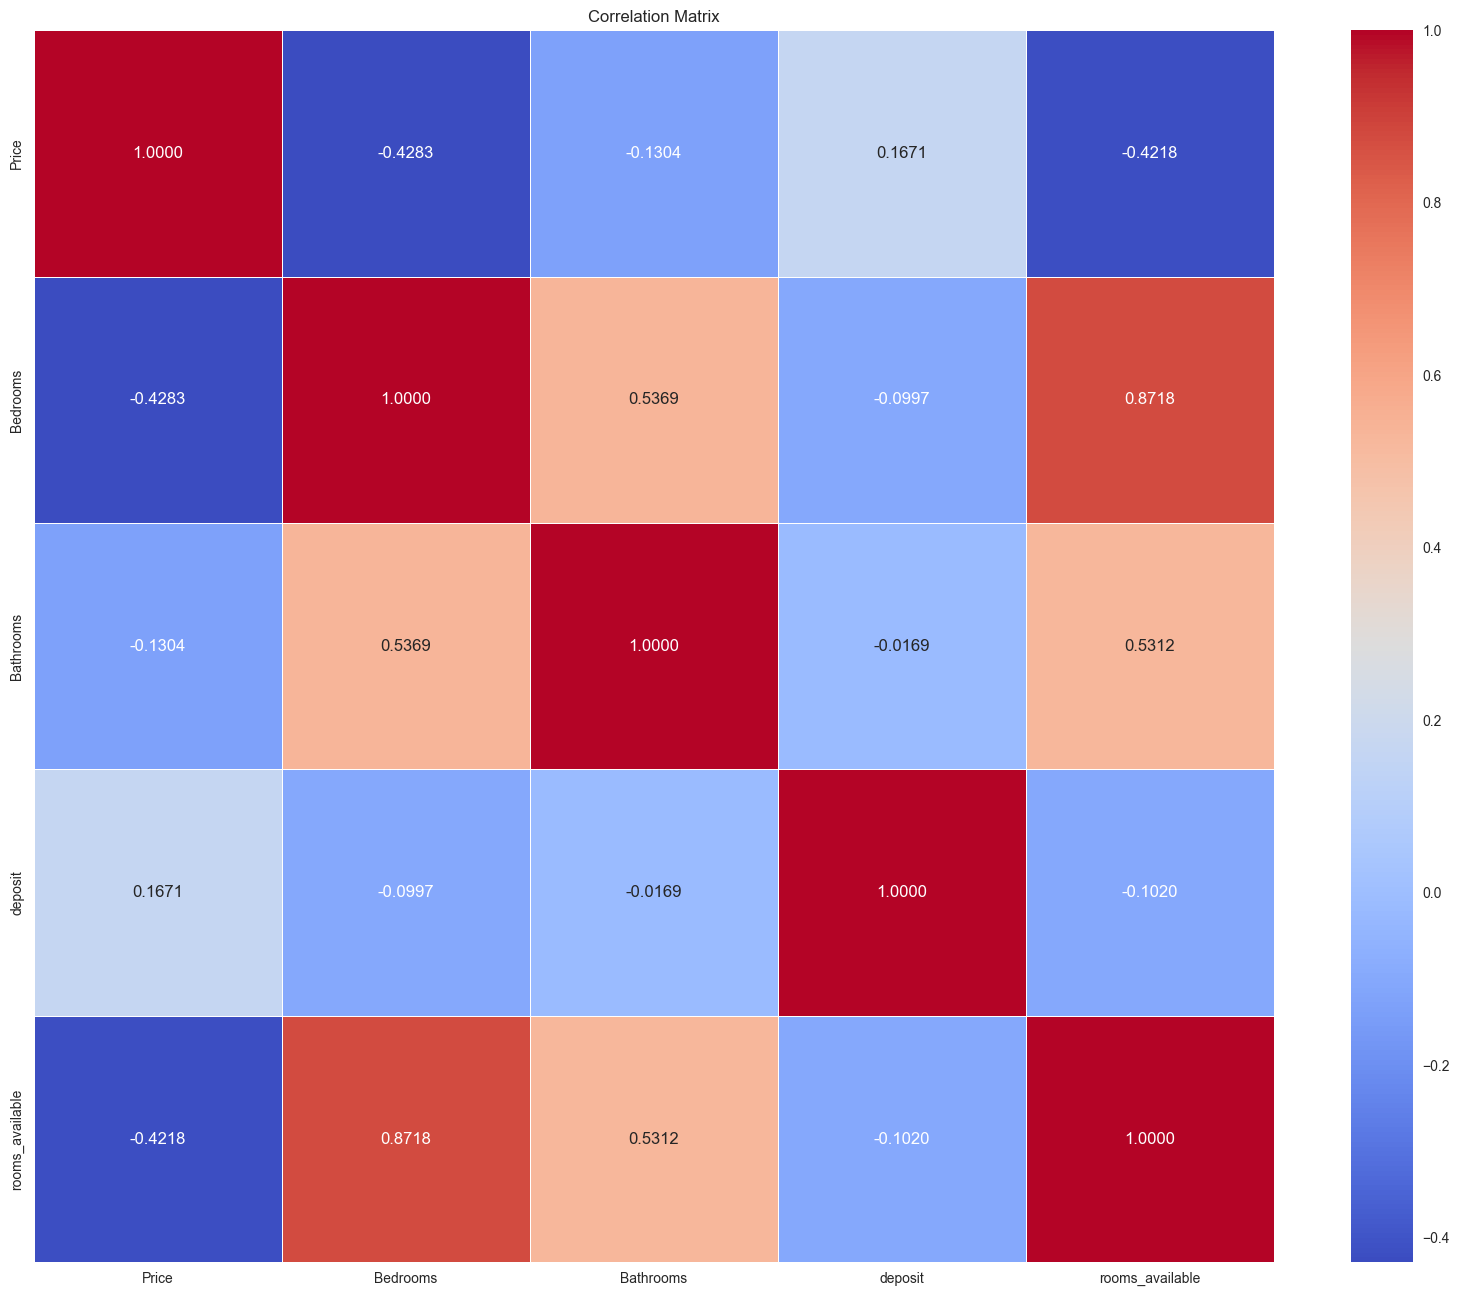

In [99]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(20, 16))
correlation_matrix = data_source.select_dtypes(include=[np.number]).corr()
 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Mengelompokan fitur menjadi numerical dan categorical.

In [ ]:
df = data_source

# Memastikan hanya data dengan tipe numerikal yang akan diproses
numeric_features = df.select_dtypes(include=['number']).columns

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns

Memeriksa dan menanggulangi Missing Values.

In [40]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = df.drop(columns=over)

# Update features
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Mengisi nilai yang hilang dengan kategori baru "Missing"
for column in categorical_features:
    df[column] = df[column].fillna("Missing")

# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

Memeriksa dan menanggulangi duplikasi data.

In [41]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()
 
print("Baris duplikat:")
print(df[duplicates])

df = df.drop_duplicates()

Baris duplikat:
      Price  Bedrooms  Bathrooms   type  \
68    138.0       7.0        2.0   flat   
148   235.0       1.0        1.0  house   
149   235.0       1.0        1.0  house   
150   235.0       1.0        1.0  house   
151   235.0       1.0        1.0  house   
...     ...       ...        ...    ...   
6195   95.0       3.0        1.0   flat   
6197  125.0       2.0        1.0   flat   
6278   85.0       7.0        2.0  house   
6314  163.0       4.0        4.0   flat   
6323  161.0       8.0        8.0   flat   

                                                address  rooms_available  Gas  \
68        Mansfield Road, Arboretum, Nottingham, NG13HW              7.0  Yes   
148         Nottingham, Lace Market, Nottingham, NG17DD              1.0   No   
149         Nottingham, Lace Market, Nottingham, NG17DD              1.0   No   
150         Nottingham, Lace Market, Nottingham, NG17DD              1.0   No   
151         Nottingham, Lace Market, Nottingham, NG17DD       

Melakukan normalisasi dan standarisasi menggunakan Min-Max Scaler dan  untuk fitur numerik.

Distribusi awal sebelum normalisasi.

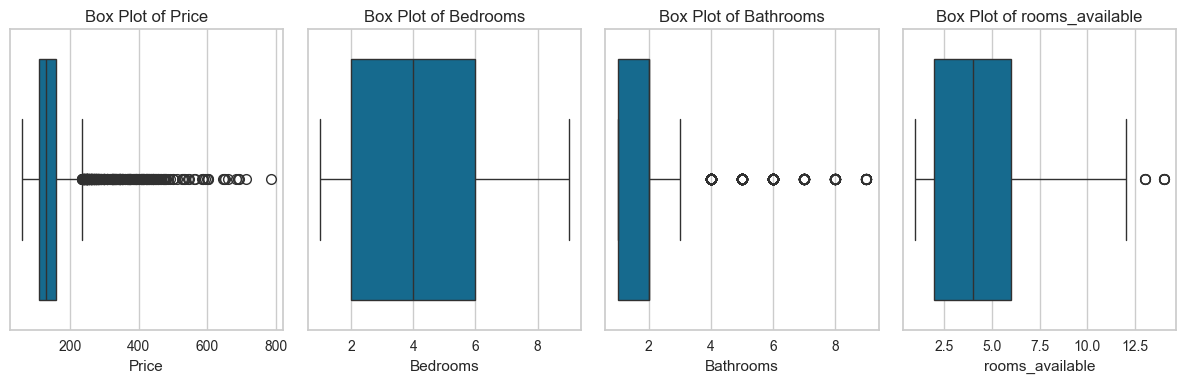

In [42]:
plt.figure(figsize=(15, (len(numeric_features) // 5 + 1) * 4))
for i, column in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) // 5 + 1), 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Min-Max Scaler.

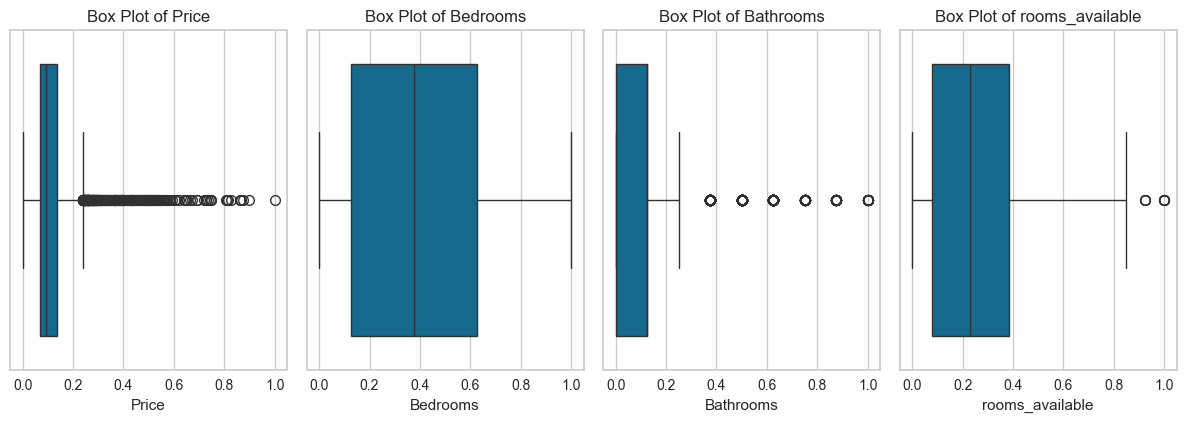

In [43]:
df_nrm = df

# Min-Max Scaling fitur numerik
mm_scaler = MinMaxScaler()
df_nrm[numeric_features] = mm_scaler.fit_transform(df[numeric_features])

plt.figure(figsize=(15, (len(df.columns) // 5 + 1) * 4))
for i, column in enumerate(numeric_features, 1):
    plt.subplot((len(df.columns) // 5 + 1), 5, i)
    sns.boxplot(x=df_nrm[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

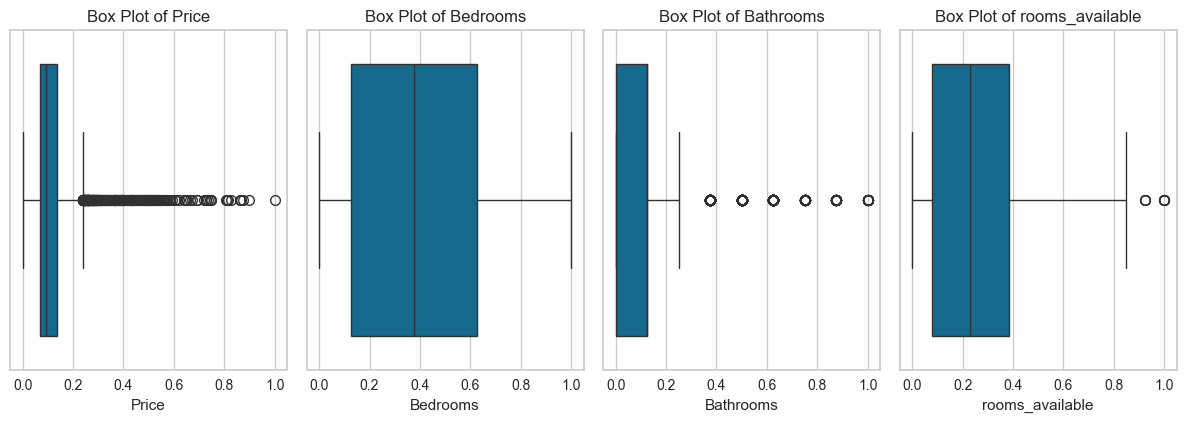

In [44]:
df_std = df

std_scaler = StandardScaler()
std_scaler.fit_transform(df_std[numeric_features])

plt.figure(figsize=(15, (len(df.columns) // 5 + 1) * 4))
for i, column in enumerate(numeric_features, 1):
    plt.subplot((len(df.columns) // 5 + 1), 5, i)
    sns.boxplot(x=df_std[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Kita akan gunakan hasil Min-Max Scaler.

In [45]:
df = df_nrm

Deteksi dan penanganan outlier.

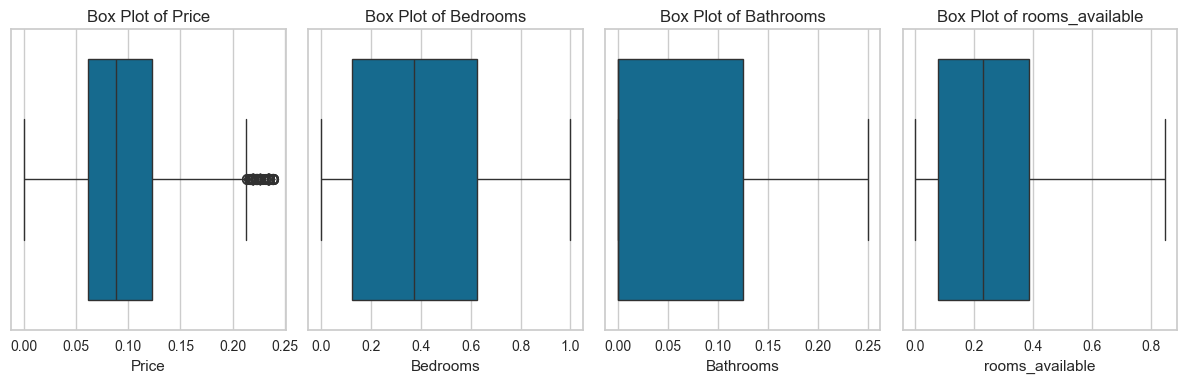

In [46]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df_drop = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

plt.figure(figsize=(15, (len(numeric_features) // 5 + 1) * 4))
for i, column in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) // 5 + 1), 5, i)
    sns.boxplot(x=df_drop[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

df = df_drop

Kolom dengan nilai ya atau tidak akan di-drop, namun akan disisakan beberapa kolom untuk kebutuhan analisa model. Kolom address memiliki terlalu banyak variasi juga akan di-drop.

In [47]:
df = df.drop(columns=['Fridge', 'Freezer', 'Oven', 'Microwave', 'Dishwasher', 'Washing machine', 'Dryer', 'Furnished', 'Double glazing', 'Separate lounge', 'Bath', 'Shower', 'Alarm', 'Fire alarm', 'Garden', 'Off road parking', 'Garage', 'Wifi', 'Sky/Cable package', 'Energy performance certificate', 'Gas safe registered', 'Electrical safety certificate', 'NRLA registered'])
df = df.drop(columns=['address'])
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

Melakukan encoding untuk kolom kategorikal.

In [48]:
df_lencoder = pd.DataFrame(df)

# Inisialisasi OrdinalEncoder
# type akan diatur manual agar memberikan hasil yang lebih sesuai.
ordinal_encoder = OrdinalEncoder(categories=[['Missing', 'studio', 'flat', 'house']])
selected_feature = ['type']
for col in selected_feature:
    df_lencoder[col] = ordinal_encoder.fit_transform(df_lencoder[[col]])

numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
     df_lencoder[col] = label_encoder.fit_transform(df_lencoder[col])
# selected_feature = ['Sector']
# for col in selected_feature:
#     df_lencoder[col] = label_encoder.fit_transform(df_lencoder[col])

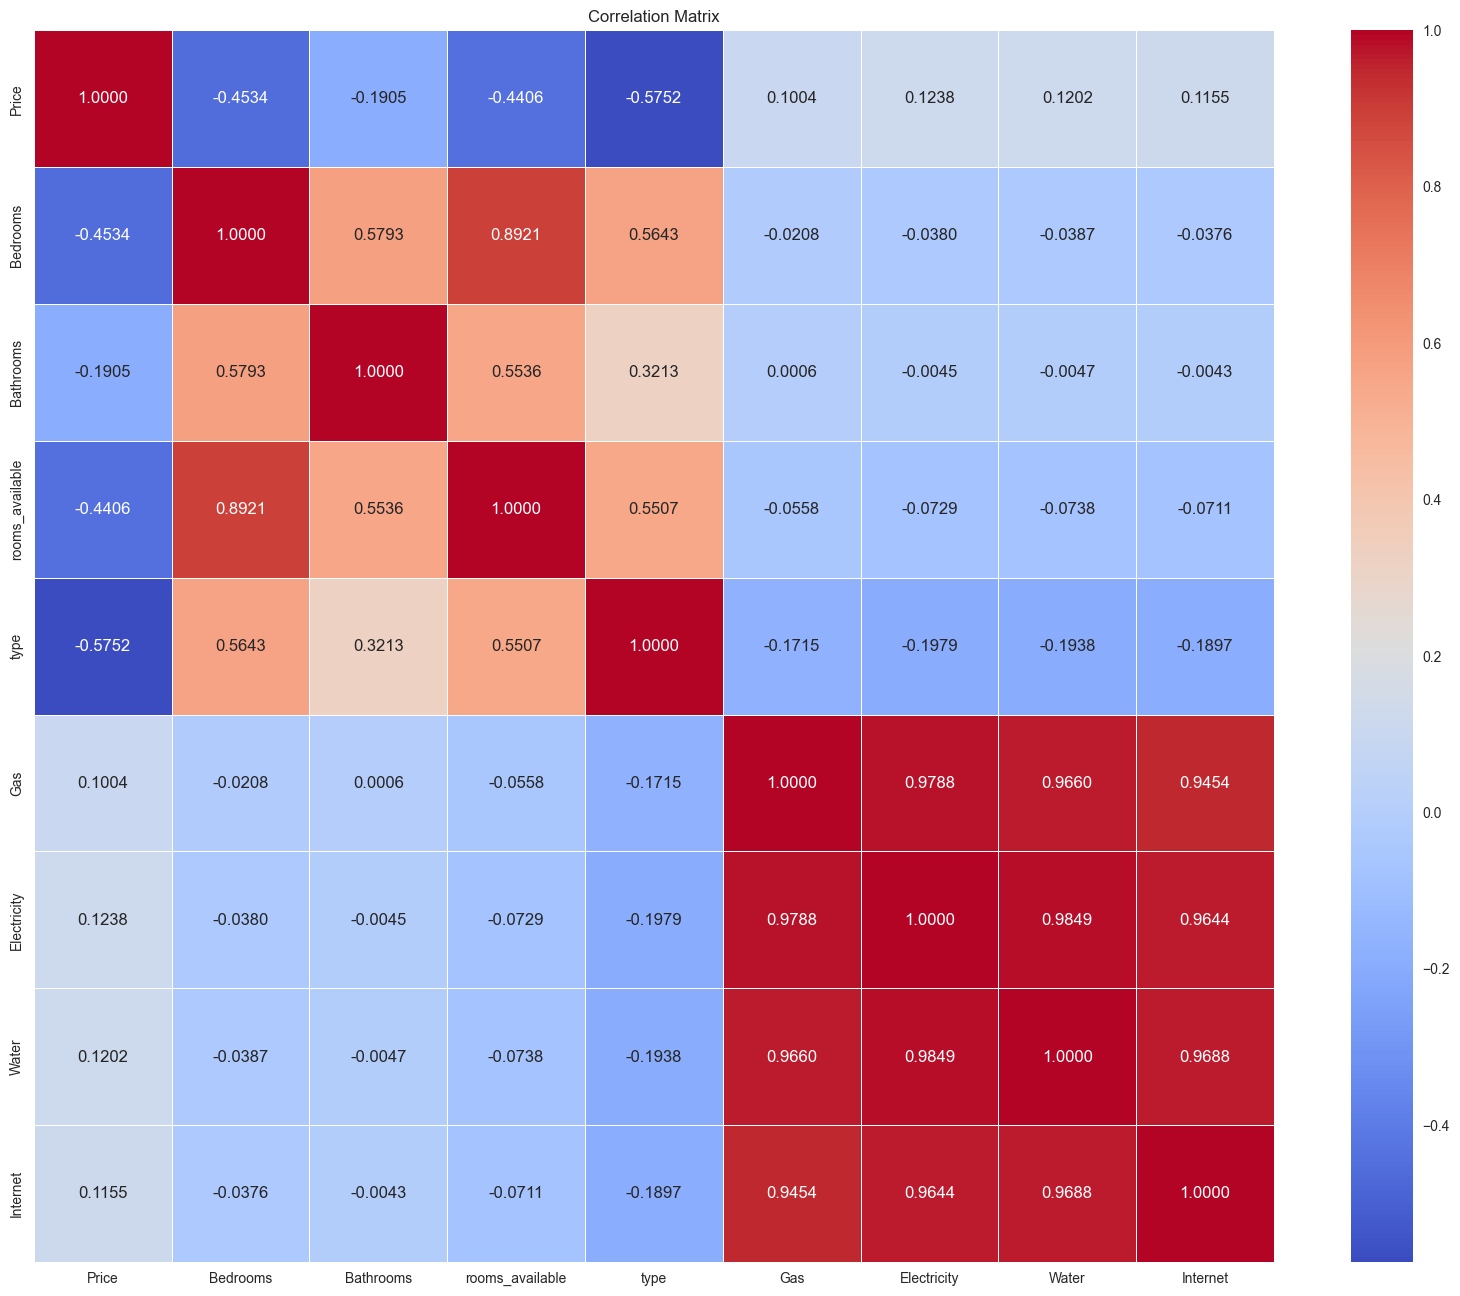

In [49]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(20, 16))
correlation_matrix = df_lencoder.select_dtypes(include=[np.number]).corr()
 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Menampilkan info data setelah proses data preprocessing.

In [50]:
df_lencoder.describe()

,Price,Bedrooms,Bathrooms,rooms_available,type,Gas,Electricity,Water,Internet
count,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,0.098130,0.370527,0.074780,0.227729,2.606806,0.328869,0.335675,0.342042,0.342920
std,0.048933,0.261767,0.087251,0.166176,0.645716,0.469854,0.472278,0.474446,0.474737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062064,0.125000,0.000000,0.076923,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.088209,0.375000,0.000000,0.230769,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.122746,0.625000,0.125000,0.384615,3.000000,1.000000,1.000000,1.000000,1.000000
max,0.238793,1.000000,0.250000,0.846154,3.000000,1.000000,1.000000,1.000000,1.000000


Distribusi data yang akan digunakan.

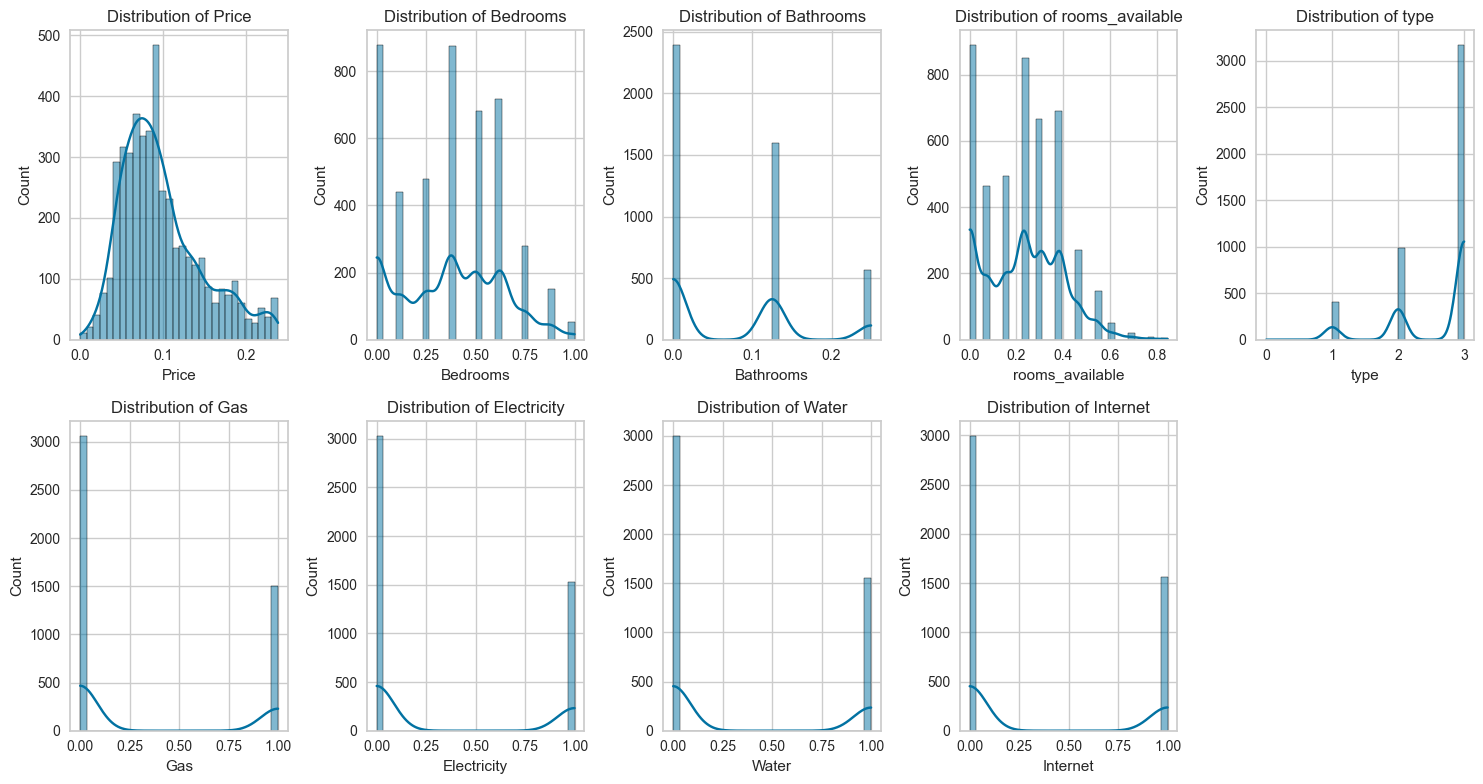

In [51]:
# Grafik

plt.figure(figsize=(15, (len(df_lencoder.columns) // 5 + 1) * 4))
for i, column in enumerate(df_lencoder.columns, 1):
    plt.subplot((len(df_lencoder.columns) // 5 + 1), 5, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Principal Component Analysis (PCA)

In [52]:
class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features
    
    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]
    
        sc = StandardScaler()
        X = sc.fit_transform(X)
    
        pca = PCA(n_components=self.q).fit(X) # calculation Covmatrix is embeded in PCA
        A_q = pca.components_.T
    
        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_
    
        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))
    
        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
            
# Usage
pfa = PFA(n_features=5)
pfa.fit(df_lencoder)
# To get the transformed matrix
x = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_
df_lencoder.iloc[:, column_indices].head()

,Electricity,type,Bathrooms,rooms_available,Internet
0,1,3,0.000,0.230769,1
1,1,3,0.000,0.230769,1
2,1,3,0.125,0.000000,1
3,1,3,0.125,0.384615,1
4,1,3,0.000,0.307692,1


Berdasarkan Principal Component Analysis (PCA), data akan difilter sesuai kolom yang tertera diatas.

In [53]:
columns_ = df_lencoder.columns[column_indices]
data = df_lencoder.loc[:,columns_].values

Model K-Means Clustering.

In [54]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
kmeans = KMeans()

model_1 = kmeans.fit(data)
# Mendapatkan label cluster
km_labels = model_1.labels_
 
# Mendapatkan jumlah cluster
k = len(np.unique(km_labels))
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_hwpd = cluster_data[:, 0].mean()  # Rata-rata Jam Kerja per Hari
        mean_mpd = cluster_data[:, 1].mean()  # Rata-rata Meeting per Hari
        mean_pc = cluster_data[:, 2].mean()  # Rata-rata Perubahan Produktifitas
        mean_sl = cluster_data[:, 3].mean()  # Rata-rata Stress Level
        mean_sc = cluster_data[:, 4].mean()  # Rata-rata Sector
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata {columns_[0]}: {mean_hwpd:.2f}")
        print(f"Rata-rata {columns_[1]}: {mean_mpd:.2f}")
        print(f"Rata-rata {columns_[2]}: {mean_pc:.2f}")
        print(f"Rata-rata {columns_[3]}: {mean_sl:.2f}")
        print(f"Rata-rata {columns_[4]}: {mean_sc:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(data, km_labels, k)
print(f"\nSilhouette Coefficient: {metrics.silhouette_score(data, km_labels):.3f}")
print("Model training selesai.")

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Electricity: 0.01
Rata-rata type: 3.00
Rata-rata Bathrooms: 0.03
Rata-rata rooms_available: 0.17
Rata-rata Internet: 0.00

Cluster 2:
Rata-rata Electricity: 1.00
Rata-rata type: 3.00
Rata-rata Bathrooms: 0.09
Rata-rata rooms_available: 0.28
Rata-rata Internet: 0.99

Cluster 3:
Rata-rata Electricity: 1.00
Rata-rata type: 1.00
Rata-rata Bathrooms: 0.00
Rata-rata rooms_available: 0.00
Rata-rata Internet: 0.99

Cluster 4:
Rata-rata Electricity: 0.00
Rata-rata type: 2.00
Rata-rata Bathrooms: 0.04
Rata-rata rooms_available: 0.12
Rata-rata Internet: 0.01

Cluster 5:
Rata-rata Electricity: 1.00
Rata-rata type: 2.00
Rata-rata Bathrooms: 0.08
Rata-rata rooms_available: 0.18
Rata-rata Internet: 1.00

Cluster 6:
Rata-rata Electricity: 0.00
Rata-rata type: 0.99
Rata-rata Bathrooms: 0.00
Rata-rata rooms_available: 0.00
Rata-rata Internet: 0.00

Cluster 7:
Rata-rata Electricity: 0.00
Rata-rata type: 3.00
Rata-rata Bathrooms: 0.09
Rata-rata 

Model DB Scans.

In [55]:
dbscan = DBSCAN()

model_2 = dbscan.fit(data)
db_labels = model_2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)
print("\nEstimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, db_labels):.3f}")
print("Model training selesai.")


Estimated number of clusters: 9
Estimated number of noise points: 5
Silhouette Coefficient: 0.821
Model training selesai.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Elbow Method

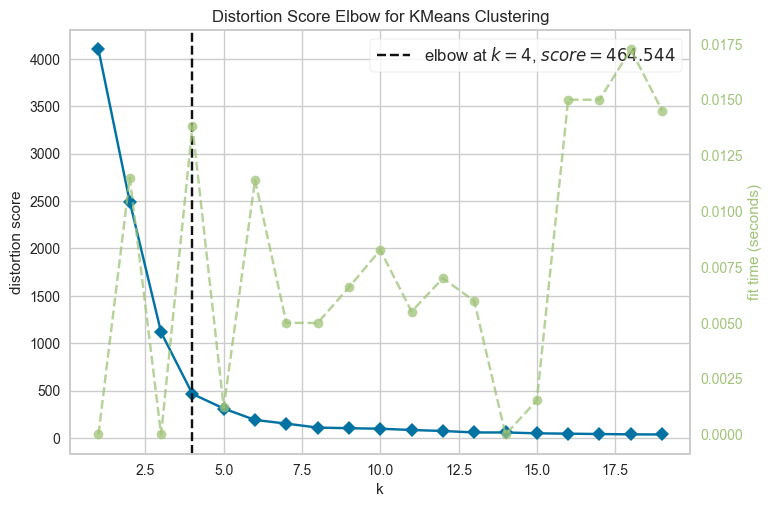

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 20))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [57]:
n_clusters = range(2,21)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k, random_state=42) )
    model.fit(data)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(data,model.named_steps["kmeans"].labels_))

In [58]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title="K-Means Model: Silhouette Score vs Number of Clusters"
    
)
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Silhouette Score")

fig.show()

In [59]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=inertia_errors,
    title="K-Means Model: Inertia vs Number of Clusters"
    
)
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Inertia")

fig.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Epsilon & min_samples DB Scan.

In [61]:
eps_values = [0.2, 0.5, 0.7, 1.0]  # Vary epsilon (neighborhood size)
min_samples_values = [10, 30, 50, 100, 200, 300, 500]  # Vary min_samples (minimum points per cluster)

res = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dummy_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dummy_dbscan.fit_predict(data)
        
        # Step 5: Show the number of clusters found
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points (-1)
        
        print(f"Eps={eps}, Min_samples={min_samples} => Number of clusters: {n_clusters_}")


Eps=0.2, Min_samples=10 => Number of clusters: 8
Eps=0.2, Min_samples=30 => Number of clusters: 7
Eps=0.2, Min_samples=50 => Number of clusters: 6
Eps=0.2, Min_samples=100 => Number of clusters: 6
Eps=0.2, Min_samples=200 => Number of clusters: 5
Eps=0.2, Min_samples=300 => Number of clusters: 3
Eps=0.2, Min_samples=500 => Number of clusters: 3
Eps=0.5, Min_samples=10 => Number of clusters: 8
Eps=0.5, Min_samples=30 => Number of clusters: 7
Eps=0.5, Min_samples=50 => Number of clusters: 6
Eps=0.5, Min_samples=100 => Number of clusters: 6
Eps=0.5, Min_samples=200 => Number of clusters: 5
Eps=0.5, Min_samples=300 => Number of clusters: 4
Eps=0.5, Min_samples=500 => Number of clusters: 3
Eps=0.7, Min_samples=10 => Number of clusters: 8
Eps=0.7, Min_samples=30 => Number of clusters: 7
Eps=0.7, Min_samples=50 => Number of clusters: 6
Eps=0.7, Min_samples=100 => Number of clusters: 6
Eps=0.7, Min_samples=200 => Number of clusters: 5
Eps=0.7, Min_samples=300 => Number of clusters: 4
Eps=0.7, 

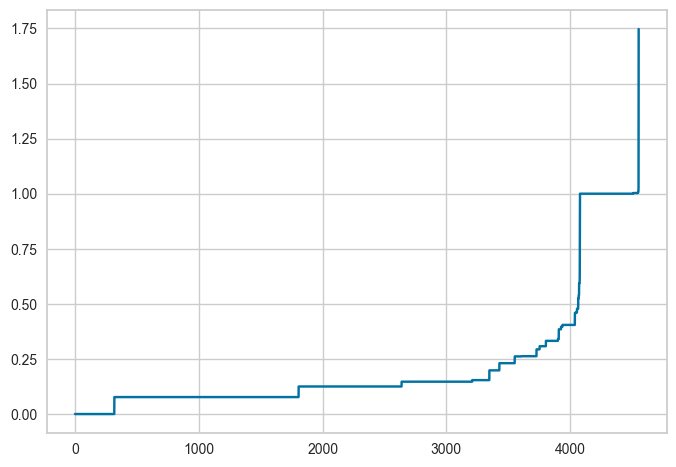

In [68]:
neighbors = NearestNeighbors(n_neighbors=300)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances[:,-1])
plt.plot(distances)

Menurut Elbow Method, jumlah cluster yang optimal adalah 4 cluster.

Model K-Means Cluster masih belum menghasilkan nilai silhouette yang optimal, maka nilai k akan diubah menjadi 4 untuk menguji kinerja model.

Model DB Scan sudah menunjukan hasil yang optimal namun jumlah cluster masil belum optimal, maka nilai epsilon akan diubah menjadi 0.5 dan min samples menjadi 300 untuk menguji kinerja model.

K-Means Cluster Adjustment

In [ ]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
kmeans_adj = KMeans(n_clusters=4)

model_1_adj = kmeans_adj.fit(data)
# Mendapatkan label cluster
km_labels_adj = model_1_adj.labels_
 
# Mendapatkan jumlah cluster
k = len(np.unique(km_labels_adj))
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_hwpd = cluster_data[:, 0].mean()  # Rata-rata Jam Kerja per Hari
        mean_mpd = cluster_data[:, 1].mean()  # Rata-rata Meeting per Hari
        mean_pc = cluster_data[:, 2].mean()  # Rata-rata Perubahan Produktifitas
        mean_sl = cluster_data[:, 3].mean()  # Rata-rata Stress Level
        mean_sc = cluster_data[:, 4].mean()  # Rata-rata Sector
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata {columns_[0]}: {mean_hwpd:.2f}")
        print(f"Rata-rata {columns_[1]}: {mean_mpd:.2f}")
        print(f"Rata-rata {columns_[2]}: {mean_pc:.2f}")
        print(f"Rata-rata {columns_[3]}: {mean_sl:.2f}")
        print(f"Rata-rata {columns_[4]}: {mean_sc:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(data, km_labels_adj, k)
print(f"\nSilhouette Coefficient: {metrics.silhouette_score(data, km_labels_adj):.3f}")
print("Model training selesai.")

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Electricity: 0.00
Rata-rata type: 3.00
Rata-rata Bathrooms: 0.09
Rata-rata rooms_available: 0.28
Rata-rata Internet: 0.00

Cluster 2:
Rata-rata Electricity: 0.95
Rata-rata type: 3.00
Rata-rata Bathrooms: 0.09
Rata-rata rooms_available: 0.28
Rata-rata Internet: 0.98

Cluster 3:
Rata-rata Electricity: 0.00
Rata-rata type: 1.81
Rata-rata Bathrooms: 0.03
Rata-rata rooms_available: 0.10
Rata-rata Internet: 0.01

Cluster 4:
Rata-rata Electricity: 1.00
Rata-rata type: 1.57
Rata-rata Bathrooms: 0.05
Rata-rata rooms_available: 0.10
Rata-rata Internet: 1.00

Silhouette Coefficient: 0.746
Model training selesai.


Setelah penyesuaian jumlah cluster, nilai silhouette naik dari 0.664 menjadi 0.746

DB Scan Adjusment

In [70]:
dbscan_adj = DBSCAN(eps=0.5, min_samples=300)

model_2_adj = dbscan_adj.fit(data)
db_labels_adj = model_2_adj.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels_adj)) - (1 if -1 in db_labels_adj else 0)
n_noise_ = list(db_labels_adj).count(-1)
print("\nEstimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, db_labels_adj):.3f}")
print("Model training selesai.")


Estimated number of clusters: 4
Estimated number of noise points: 475
Silhouette Coefficient: 0.730
Model training selesai.


Setelah penyesuaian epsilon dan min samples, jumlah cluster menjadi 4, namun banyak noise yang ada meningkat dari 5 menjadi 475, dan nilai silhouette turun dari 0.821 menjadi 0.730.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

K-Means Clustering

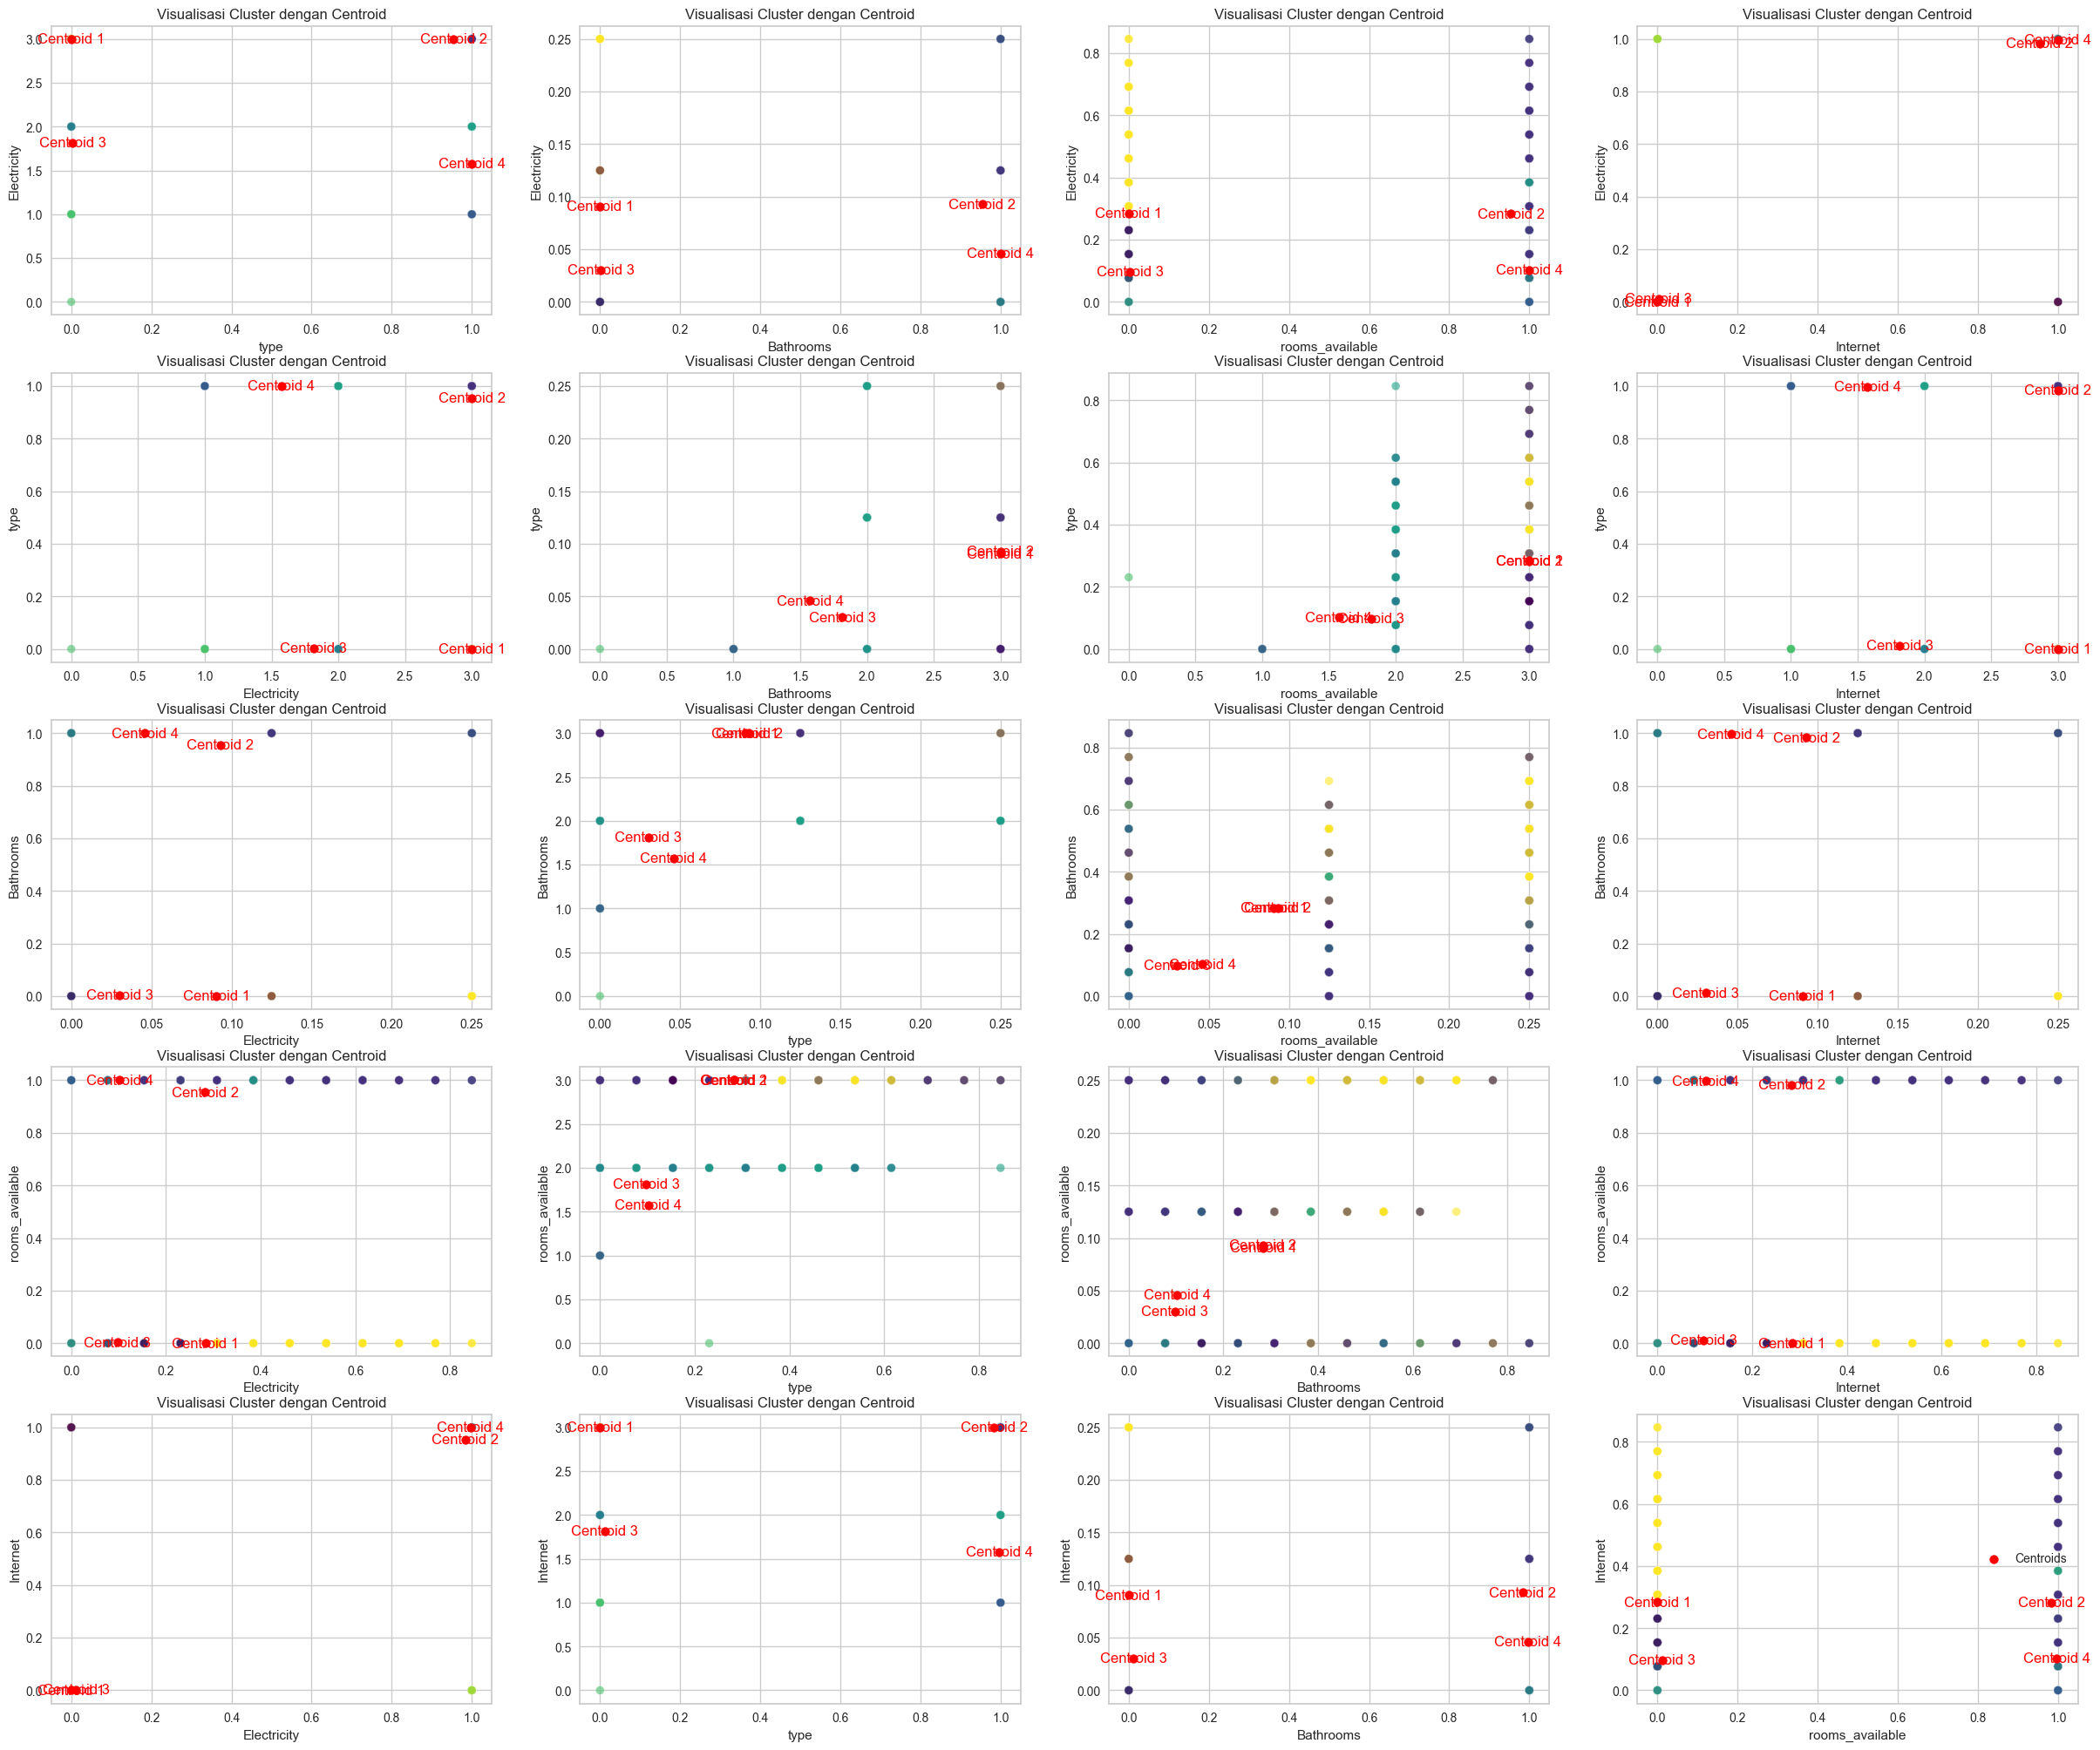

Nilai Centroids:
Centroid 1: Electricity = 0.00, type = 3.00, Bathrooms = 0.09, rooms_available = 0.28, Internet = -0.00
Centroid 2: Electricity = 0.95, type = 3.00, Bathrooms = 0.09, rooms_available = 0.28, Internet = 0.98
Centroid 3: Electricity = 0.00, type = 1.81, Bathrooms = 0.03, rooms_available = 0.10, Internet = 0.01
Centroid 4: Electricity = 1.00, type = 1.57, Bathrooms = 0.05, rooms_available = 0.10, Internet = 1.00


In [81]:
# Menentukan posisi centroid
km_centroids = kmeans_adj.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(30, 25))

num = 0
for i_, column in enumerate(columns_, 0):
    for j_, column in enumerate(columns_, 0):
        if i_ != j_:
            num+=1
            plt.subplot(len(columns_), len(columns_)-1, num)
            # Plot data
            plt.scatter(data[:, i_], data[:, j_], c=km_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
            
            # Plot centroid
            plt.scatter(km_centroids[:, i_], km_centroids[:, j_], c='red', s=200, marker='.', label='Centroids')
            
            # Menambahkan label centroid pada plot
            for i, centroid in enumerate(km_centroids):
                plt.text(centroid[i_], centroid[j_], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
            
            # Menambahkan judul dan label
            plt.title('Visualisasi Cluster dengan Centroid')
            plt.xlabel(f'{columns_[j_]}')
            plt.ylabel(f'{columns_[i_]}')
plt.legend() 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(km_centroids, 1):
    print(f"Centroid {i}: {columns_[0]} = {centroid[0]:.2f}, {columns_[1]} = {centroid[1]:.2f}, {columns_[2]} = {centroid[2]:.2f}, {columns_[3]} = {centroid[3]:.2f}, {columns_[4]} = {centroid[4]:.2f}")

In [72]:
x_grp_by_label = df_lencoder[columns_].groupby(km_labels_adj).mean()

# Create side-by-side bar chart of `x_grp_by_label`
fig = px.bar(
    x_grp_by_label,
    barmode="group"
)
fig.update_layout(xaxis_title="Clusters", yaxis_title="Value [$]")

# Instantiate transformer
pca = PCA(n_components=2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(df_lencoder[columns_])

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1","PC2"])

X_pca.head()
fig.show()

DB Scan

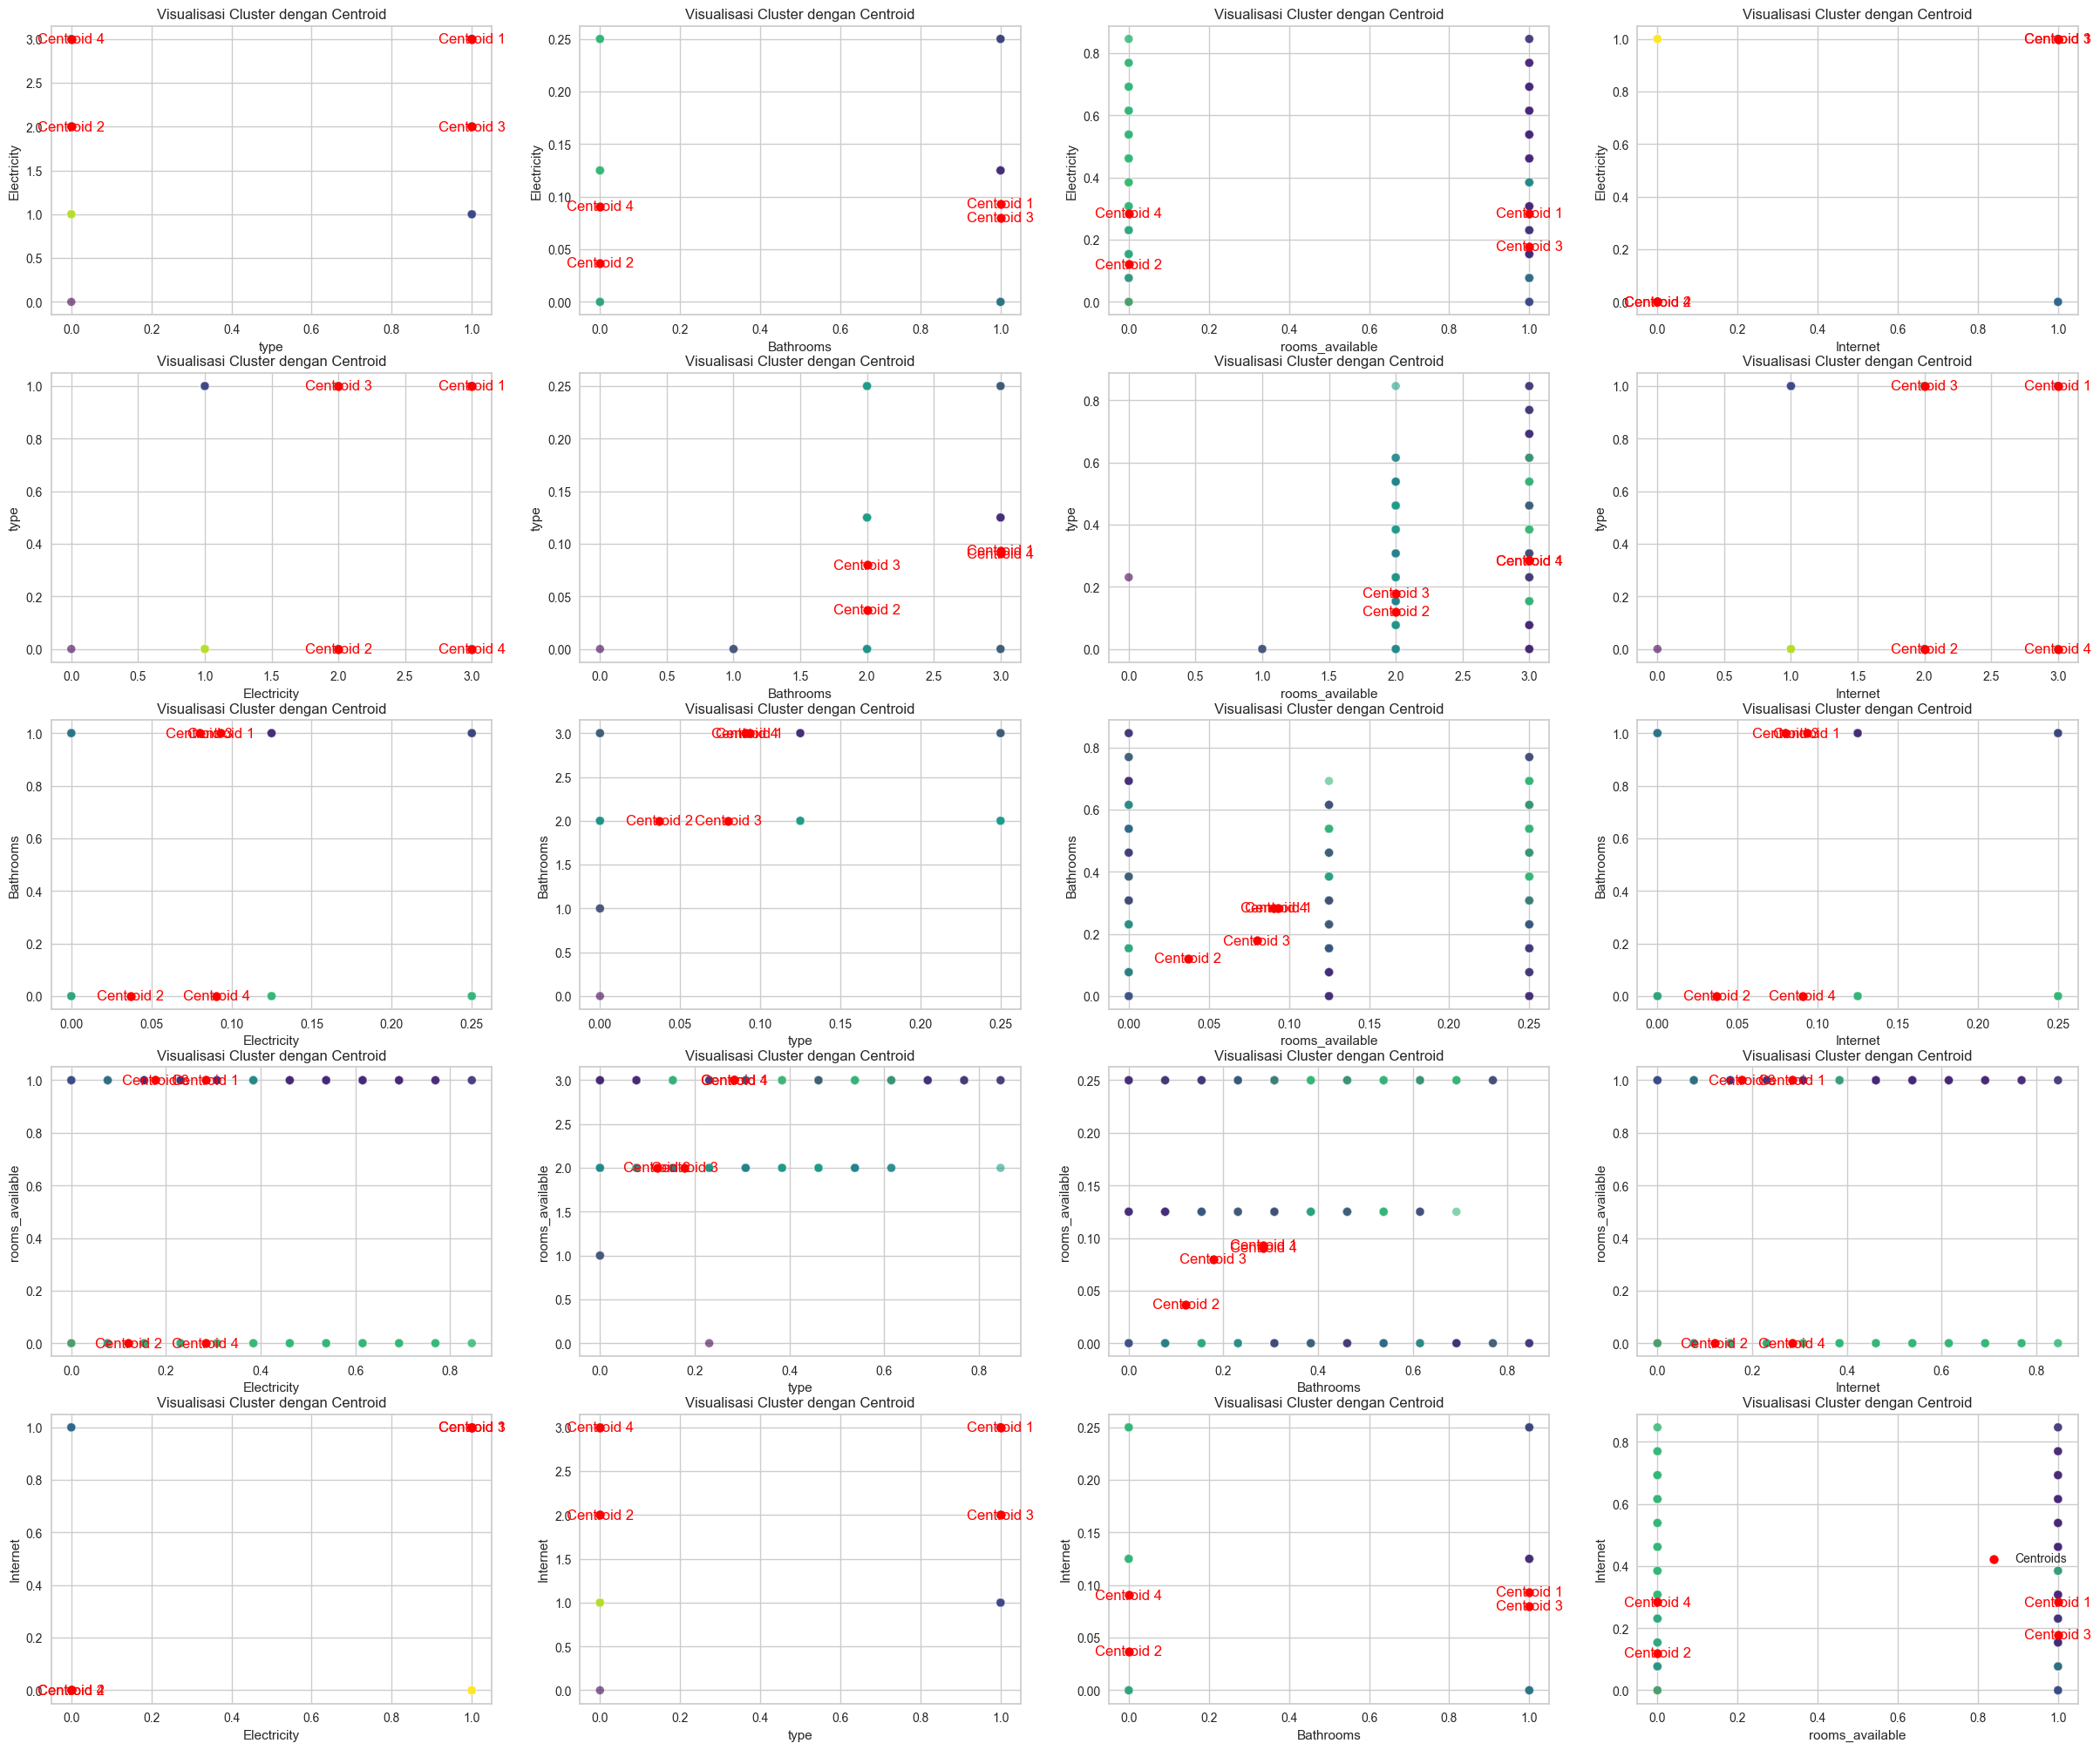

Silhouette Coefficient: 0.730
Nilai Centroids:
Centroid 1: Electricity = 1.00, type = 3.00, Bathrooms = 0.09, rooms_available = 0.28, Internet = 1.00
Centroid 2: Electricity = 0.00, type = 2.00, Bathrooms = 0.04, rooms_available = 0.12, Internet = 0.00
Centroid 3: Electricity = 1.00, type = 2.00, Bathrooms = 0.08, rooms_available = 0.18, Internet = 1.00
Centroid 4: Electricity = 0.00, type = 3.00, Bathrooms = 0.09, rooms_available = 0.28, Internet = 0.00


In [82]:
# Menentukan posisi centroid
cluster_center = []
label = set(dbscan_adj.labels_)
for i in label:
    if i != -1:
        points_of_cluster = data[db_labels_adj==i]
        centroid_of_cluster = points_of_cluster.mean(axis=0) 
        cluster_center.append(centroid_of_cluster)
db_centroids = np.array(cluster_center)
# Visualisasi cluster
plt.figure(figsize=(30, 25))

num = 0
for i_, column in enumerate(columns_, 0):
    for j_, column in enumerate(columns_, 0):
        if i_ != j_:
            num+=1
            plt.subplot(len(columns_), len(columns_)-1, num)
            # Plot data
            plt.scatter(data[:, i_], data[:, j_], c=db_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
            
            # Plot centroid
            plt.scatter(db_centroids[:, i_], db_centroids[:, j_], c='red', s=200, marker='.', label='Centroids')
            
            # Menambahkan label centroid pada plot
            for i, centroid in enumerate(db_centroids):
                plt.text(centroid[i_], centroid[j_], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
            
            # Menambahkan judul dan label
            plt.title('Visualisasi Cluster dengan Centroid')
            plt.xlabel(f'{columns_[j_]}')
            plt.ylabel(f'{columns_[i_]}')
plt.legend() 
plt.show()

# Menampilkan nilai Shilhouette
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, dbscan_adj.labels_))

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(db_centroids, 1):
    print(f"Centroid {i}: {columns_[0]} = {centroid[0]:.2f}, {columns_[1]} = {centroid[1]:.2f}, {columns_[2]} = {centroid[2]:.2f}, {columns_[3]} = {centroid[3]:.2f}, {columns_[4]} = {centroid[4]:.2f}")

In [74]:
x_grp_by_label = df_lencoder[columns_].groupby(db_labels_adj).mean()

# Create side-by-side bar chart of `x_grp_by_label`
fig = px.bar(
    x_grp_by_label,
    barmode="group"
)
fig.update_layout(xaxis_title="Clusters", yaxis_title="Value [$]")

# Instantiate transformer
pca = PCA(n_components=2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(df_lencoder[columns_])

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1","PC2"])

X_pca.head()
fig.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

K-Means Cluster

In [75]:
analyze_clusters(data, km_labels_adj, k)
print(f"\nSilhouette Coefficient: {metrics.silhouette_score(data, km_labels_adj):.3f}")

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Electricity: 0.00
Rata-rata type: 3.00
Rata-rata Bathrooms: 0.09
Rata-rata rooms_available: 0.28
Rata-rata Internet: 0.00

Cluster 2:
Rata-rata Electricity: 0.95
Rata-rata type: 3.00
Rata-rata Bathrooms: 0.09
Rata-rata rooms_available: 0.28
Rata-rata Internet: 0.98

Cluster 3:
Rata-rata Electricity: 0.00
Rata-rata type: 1.81
Rata-rata Bathrooms: 0.03
Rata-rata rooms_available: 0.10
Rata-rata Internet: 0.01

Cluster 4:
Rata-rata Electricity: 1.00
Rata-rata type: 1.57
Rata-rata Bathrooms: 0.05
Rata-rata rooms_available: 0.10
Rata-rata Internet: 1.00

Silhouette Coefficient: 0.746


DB Scan

In [83]:
print("Nilai Centroids:")
for i, centroid in enumerate(db_centroids, 1):
    print(f"Centroid {i}: {columns_[0]} = {centroid[0]:.2f}, {columns_[1]} = {centroid[1]:.2f}, {columns_[2]} = {centroid[2]:.2f}, {columns_[3]} = {centroid[3]:.2f}, {columns_[4]} = {centroid[4]:.2f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, db_labels_adj):.3f}")

Nilai Centroids:
Centroid 1: Electricity = 1.00, type = 3.00, Bathrooms = 0.09, rooms_available = 0.28, Internet = 1.00
Centroid 2: Electricity = 0.00, type = 2.00, Bathrooms = 0.04, rooms_available = 0.12, Internet = 0.00
Centroid 3: Electricity = 1.00, type = 2.00, Bathrooms = 0.08, rooms_available = 0.18, Internet = 1.00
Centroid 4: Electricity = 0.00, type = 3.00, Bathrooms = 0.09, rooms_available = 0.28, Internet = 0.00
Silhouette Coefficient: 0.730


Tulis hasil interpretasinya di sini.

K-Means Cluster
1. Cluster 1:   
    - Tidak memiliki listrik, type rumah, memiliki kamar mandi yang cukup, kesediaan ruangan moderat, dan tidak memiliki internet.
    Kluster ini berfokus ke type rumah dengan ketersediaan ruangan moderat, dan kamar mandi yang memadai. Namun tidak menyediakan listrik dan internet.
    - Kluster ini diperuntukan bagi siswa yang mencari akomodasi bertipe rumah dan tidak terlalu mementingkan fasilitas.
2. Cluster 2:   
    - Cenderung memiliki listrik, type rumah, memiliki kamar mandi yang cukup, kesediaan ruangan moderat, dan dominan memiliki internet.
    Kluster ini berfokus ke type rumah berfasilitas lengkap dengan ketersediaan ruangan moderat.
    - Kluster ini diperuntukan bagi siswa yang mencari akomodasi bertipe rumah dan memiliki fasilitas lengkap.
3. Cluster 3:   
    - Tidak memiliki listrik, type campuran, memiliki kamar mandi yang sangat sedikit, kesediaan ruangan rendah, dan sangat dominan tidak memiliki internet.
    - Kluster ini ber-type campuran antara studio dan flat dengan ketersediaan ruangan rendah. Namun tidak menyediakan listrik, kamar mandi yang kurang memadai, dan mayoritas tidak memiliki internet.
    - Kluster ini diperuntukan bagi siswa yang mencari akomodasi dengan harga sangat murah.
4. Cluster 4:   
    - Memiliki listrik, type campuran, memiliki kamar mandi yang sedikit, kesediaan ruangan rendah, dan memiliki internet.
    - Kluster ini ber-type campuran antara studio dan flat dengan fasilitas listrik dan internet dengan ketersediaan ruangan rendah. Namun memiliki kamar mandi yang kurang memadai.
    -Kluster ini diperuntukan bagi siswa yang mencari akomodasi dengan fasilitas yang cukup dan harga yang relatif terjangkau.

    
DB Scan
1. Cluster 1:   
    - Memiliki listrik, type rumah, memiliki kamar mandi yang cukup, kesediaan ruangan moderat, dan memiliki internet.
    - Kluster ini berfokus ke type rumah dengan ketersediaan ruangan moderat, dan kamar mandi yang memadai. Namun tidak menyediakan listrik dan internet.
    - Kluster ini diperuntukan bagi siswa yang mencari akomodasi bertipe rumah dan memiliki fasilitas lengkap.
2. Cluster 2:   
    - Tidak memiliki listrik, type flat, memiliki kamar mandi yang kurang memadai, kesediaan ruangan rendah, dan tidak memiliki internet.
    - Kluster ini berfokus ke type flat berfasilitas lengkap dengan ketersediaan ruangan moderat.
    - Kluster ini diperuntukan bagi siswa yang mencari akomodasi bertipe flat dengan harga sangat murah.
3. Cluster 3:   
    - Memiliki listrik, type flat, memiliki kamar mandi yang memadai, kesediaan ruangan relatif rendah, dan memiliki internet.
    - Kluster ini berfokus ke type flat berfasilitas lengkap dengan ketersediaan ruangan relatif rendah
    - Kluster ini dapat diperuntukan bagi siswa mencari akomodasi bertipe flat berfasilitas lengkap dengan harga lebih murah.
4. Cluster 4:   
    - Tidak memiliki listrik, type rumah, memiliki kamar mandi memadai, kesediaan ruangan moderat, dan tidak memiliki internet.
    - Kluster ini ber-type campuran antara studio dan flat dengan fasilitas listrik dan internet dengan ketersediaan ruangan rendah. Namun memiliki kamar mandi yang kurang memadai.
    - Kluster ini diperuntukan bagi siswa yang mencari akomodasi bertipe rumah dan tidak terlalu mementingkan fasilitas.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [136]:
print(columns_+list(['cluster']))

Index(['Electricitycluster', 'typecluster', 'Bathroomscluster',
       'rooms_availablecluster', 'Internetcluster'],
      dtype='object')


In [148]:
# Menambahkan label ke data
df_lencoder["cluster"] = kmeans_adj.labels_
df_lencoder.loc[:,['type', 'Bathrooms', 'rooms_available', 'Electricity', 'Internet', 'cluster']].to_csv('cluster.csv')